**Goal** 

The goal of this challenge is to help cities predict future noise levels and, if possible, explain complaint trends that can be attributed to leisure noise levels, starting from the
San Salvario District and extending to different parts of the City.

This enables the creation of expert systems to support better policies to prevent and decrease noise levels and complaints related to noise. It is encouraged to look at other data sources besides those provided here, such as events
(e.g. football games), school and university calendar, weather, etc....

**Outcome** 

The outcome of this challenge is three-fold:
1. Build a model that can predict noise in recreational nightlife, especially peaks of
noise outside what is considered normal (outliers);
2. Study the feasibility of predicting the complaints related to noise levels;
3. Suggesting a framework of how these models can be integrated into the city’s
decision making process and allocation of resources.

In [104]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

In [ ]:
#!pip install xlrd 

# Noise Data

In [95]:
san_salvario_2021 = pd.read_csv("https://raw.githubusercontent.com/fernandeslouro/wdl/master/finals/data/noise_data/san_salvario_2021.csv", encoding="latin1", skiprows=8, sep=";", decimal=",")
san_salvario_2020 = pd.read_csv("https://raw.githubusercontent.com/fernandeslouro/wdl/master/finals/data/noise_data/san_salvario_2020.csv", encoding="latin1", skiprows=8, sep=";", decimal=",")
san_salvario_2019 = pd.read_csv("https://raw.githubusercontent.com/fernandeslouro/wdl/master/finals/data/noise_data/san_salvario_2019.csv", encoding="latin1", skiprows=8, sep=";", decimal=",")
san_salvario_2018 = pd.read_csv("https://raw.githubusercontent.com/fernandeslouro/wdl/master/finals/data/noise_data/san_salvario_2018.csv", encoding="latin1", skiprows=8, sep=";", decimal=",")
san_salvario_2017 = pd.read_csv("https://raw.githubusercontent.com/fernandeslouro/wdl/master/finals/data/noise_data/san_salvario_2017.csv", encoding="latin1", skiprows=8, sep=";", decimal=",")
san_salvario_2016 = pd.read_csv("https://raw.githubusercontent.com/fernandeslouro/wdl/master/finals/data/noise_data/san_salvario_2016.csv", encoding="latin1", skiprows=8, sep=";", decimal=",")
# Data/ora inizio periodo: 01-01-2021 00:00
# Data/ora fine periodo: 22-06-2021 23:59
# Dati non validati
# C1 = Smart 01, LAeq - orario - dB(A)
# C2 = Smart 02, LAeq - orario - dB(A)
# C3 = Smart 03, LAeq - orario - dB(A)
# C4 = Smart 05, LAeq - orario - dB(A)
# C5 = Smart 06, LAeq - orario - dB(A)

In [96]:
san_salvario_2019

,Data,Ora,C1,C2,C3,C4,C5
0,01-01-2019,00:00,69.7,69.4,73.9,70.5,65.5
1,01-01-2019,01:00,61.0,62.6,67.0,60.7,63.6
2,01-01-2019,02:00,62.0,65.8,68.7,59.9,61.0
3,01-01-2019,03:00,56.3,68.0,58.1,57.7,60.2
4,01-01-2019,04:00,55.5,69.0,56.6,58.0,59.7
...,...,...,...,...,...,...,...
8755,31-12-2019,19:00,62.2,59.8,60.3,NaN,NaN
8756,31-12-2019,20:00,59.4,59.7,55.9,NaN,NaN
8757,31-12-2019,21:00,59.2,61.0,56.0,NaN,NaN
8758,31-12-2019,22:00,57.0,60.2,56.0,NaN,NaN


<AxesSubplot:>

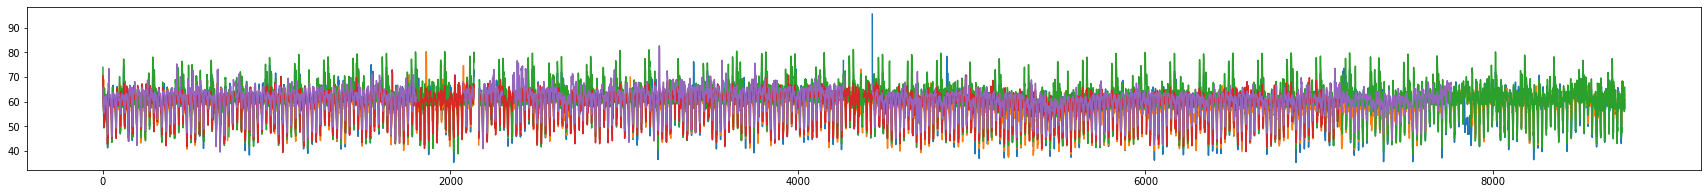

In [103]:
plt.figure(figsize=(30, 3))
san_salvario_2019.C1.plot()
san_salvario_2019.C2.plot()
san_salvario_2019.C3.plot()
san_salvario_2019.C4.plot()
san_salvario_2019.C5.plot()

In [30]:
tto1_5min = pd.read_csv("https://raw.githubusercontent.com/fernandeslouro/wdl/master/finals/data/noise_data/TTO-001_5minute.csv")
tto1_hour = pd.read_csv("https://raw.githubusercontent.com/fernandeslouro/wdl/master/finals/data/noise_data/TTO-001_hourly.csv")
tto2_5min = pd.read_csv("https://raw.githubusercontent.com/fernandeslouro/wdl/master/finals/data/noise_data/TTO-002_5minute.csv")
tto2_hour = pd.read_csv("https://raw.githubusercontent.com/fernandeslouro/wdl/master/finals/data/noise_data/TTO-002_hourly.csv")

In [32]:
tto1_5min

,date (UTC),time (UTC),mean,number of points,filtered mean,filtered number of points
0,23-11-2018,00:00:00,66.9,299,NaN,0
1,23-11-2018,00:05:00,75.1,300,NaN,0
2,23-11-2018,00:10:00,65.2,300,NaN,0
3,23-11-2018,00:15:00,64.3,300,NaN,0
4,23-11-2018,00:20:00,64.5,300,NaN,0
...,...,...,...,...,...,...
238957,24-06-2021,06:40:00,67.5,300,NaN,0
238958,24-06-2021,06:45:00,66.2,300,NaN,0
238959,24-06-2021,06:50:00,66.7,300,NaN,0
238960,24-06-2021,06:55:00,68.2,300,NaN,0


In [33]:
tto1_hour

,date (UTC),time (UTC),mean,number of points,filtered mean,filtered number of points
0,23-11-2018,00:00:00,67.5,3599,NaN,0
1,23-11-2018,01:00:00,64.3,3600,NaN,0
2,23-11-2018,02:00:00,63.4,3600,NaN,0
3,23-11-2018,03:00:00,63.5,3600,NaN,0
4,23-11-2018,04:00:00,65.2,3600,NaN,0
...,...,...,...,...,...,...
14995,11-08-2020,21:00:00,68.8,3600,NaN,0
14996,11-08-2020,22:00:00,67.0,3600,NaN,0
14997,11-08-2020,23:00:00,66.7,3600,NaN,0
14998,12-08-2020,00:00:00,67.2,3600,NaN,0


# Census Data

In [77]:
torino = gpd.read_file("https://raw.githubusercontent.com/fernandeslouro/wdl/master/finals/data/census_data/Torino_ACE81_3003.json")
#torino = gpd.read_file("https://github.com/fernandeslouro/wdl/blob/master/finals/data/census_data/Torino_ACE81_3003.shp?raw=true")

In [78]:
torino.head(3)

,id,ACE,COD_AREA_S,COD_ASC,COD_FIUME,COD_ISTAT,COD_IS_AMM,COD_IS_LAC,COD_IS_MAR,COD_LAGO,...,COD_ZONA_C,COM_ASC,LOC2011,PRO_COM,SEZ,SEZ2011,Shape_Area,Shape_Leng,TIPO_LOC,geometry
0,0,81,0.0,8,20019.0,1001272.0,0.0,0.0,0.0,0.0,...,0.0,1272008.0,127210001.0,1272.0,3790.0,12720003790,17122.466063,601.187894,1.0,"POLYGON ((1397684.098 4990958.745, 1397676.338..."
1,1,81,0.0,8,0.0,1001272.0,0.0,0.0,0.0,0.0,...,0.0,1272008.0,127210001.0,1272.0,331.0,12720000331,11664.272996,451.345452,1.0,"POLYGON ((1396544.848 4990399.869, 1396674.057..."
2,2,81,0.0,8,20019.0,1001272.0,0.0,0.0,0.0,0.0,...,0.0,1272008.0,127210001.0,1272.0,3788.0,12720003788,27377.568756,1192.624459,1.0,"POLYGON ((1397381.695 4990677.529, 1397368.147..."


In [79]:
sezione = gpd.read_file("https://raw.githubusercontent.com/fernandeslouro/wdl/master/finals/data/census_data/sezioni_censimento_geo_CAP.json")

In [80]:
sezione.head(4)

,id,AN_0_14,AN_15_64,ASL,DENCIM,DISTRASS,LOCALITA,NCIRCO,NFAMIGL,NFEMM,NMASCHI,NRESID,NSTRAN,OLT_65_A,PARROCCH,SEZCENS,SUPERF,TIPOSEZ,ZONASTAT,geometry
0,0,23.0,121.0,ASL TO1,Monumentale,08A,TORINO,8.0,94.0,86.0,95.0,181.0,42.0,37.0,Santi Pietro e Paolo Apostoli,326.0,5593.24,0.0,09,"POLYGON ((1396082.920 4990558.645, 1396116.595..."
1,1,29.0,167.0,ASL TO1,Monumentale,08A,TORINO,8.0,144.0,129.0,123.0,252.0,110.0,56.0,Santi Pietro e Paolo Apostoli,328.0,8403.30,0.0,09,"POLYGON ((1396230.062 4990481.191, 1396261.287..."
2,2,26.0,149.0,ASL TO1,Monumentale,08A,TORINO,8.0,126.0,117.0,112.0,229.0,26.0,54.0,Santi Pietro e Paolo Apostoli,336.0,9976.84,0.0,09,"POLYGON ((1396319.969 4990427.448, 1396404.856..."
3,3,45.0,192.0,ASL TO1,Monumentale,08A,TORINO,8.0,160.0,153.0,141.0,294.0,27.0,57.0,Santi Pietro e Paolo Apostoli,338.0,15116.92,0.0,09,"POLYGON ((1396509.732 4990327.177, 1396638.065..."


# Noise Sensor GIS

In [90]:
openoise = gpd.read_file("https://raw.githubusercontent.com/fernandeslouro/wdl/master/finals/data/noise_sensor_GIS/Rilievi%20openoise.json")
openoise_loc = gpd.read_file("data/noise_sensor_GIS/Rilievi openoise.shp")

In [92]:
openoise_loc

,Id,Sito,Indirizzo,Altezza,Dist_rifl,classe,geometry
0,S_06,TOBIKE 77,C.so Marconi 27,2.55,NaN,0,POINT (7.68255 45.05555)
1,S_05,TOBIKE 75,Via Baretti 17,2.55,2.65,2,POINT (7.68134 45.05759)
2,S_03,Palo Luce,L.go Saluzzo,3.10,NaN,1,POINT (7.67886 45.05850)
3,S_02,ANCOSConfartigianato,"Via Principe Tommaso, 18 bis",5.10,1.00,3,POINT (7.68157 45.05782)
4,S_01,Polizia Municipale,Via Saluzzo 26,5.50,NaN,2,POINT (7.67905 45.05925)


In [83]:
openoise

,id,Altezza,Dist_rifl,Id,Indirizzo,Sito,classe,geometry
0,0,2.55,NaN,S_06,C.so Marconi 27,TOBIKE 77,0,POINT (7.68255 45.05555)
1,1,2.55,2.65,S_05,Via Baretti 17,TOBIKE 75,2,POINT (7.68134 45.05759)
2,2,3.10,NaN,S_03,L.go Saluzzo,Palo Luce,1,POINT (7.67886 45.05850)
3,3,5.10,1.00,S_02,"Via Principe Tommaso, 18 bis",ANCOSConfartigianato,3,POINT (7.68157 45.05782)
4,4,5.50,NaN,S_01,Via Saluzzo 26,Polizia Municipale,2,POINT (7.67905 45.05925)


In [107]:
for indice, row in openoise.iterrows():
    folium.Marker(
        location=[row.geometry],
        icon=folium.map.Icon(color='yellow')
    ).add_to(map_osm)
map_osm

<ipython-input-107-58a0775fb1dc>:4: UserWarning: color argument of Icon should be one of: {'lightgreen', 'blue', 'white', 'black', 'cadetblue', 'darkgreen', 'purple', 'darkred', 'lightred', 'lightgray', 'darkpurple', 'lightblue', 'green', 'darkblue', 'pink', 'red', 'orange', 'gray', 'beige'}.
  icon=folium.map.Icon(color='yellow')


ValueError: Expected two (lat, lon) values for location, instead got: [<shapely.geometry.point.Point object at 0x7f266b831bb0>].

# Police Complaints 

In [62]:
dec2019 = pd.read_csv("https://raw.githubusercontent.com/fernandeslouro/wdl/master/finals/data/police_complaints/OpenDataContact_Luglio_Dicembre_2019.csv", encoding="latin1", sep=";")
dec2018 = pd.read_csv("https://raw.githubusercontent.com/fernandeslouro/wdl/master/finals/data/police_complaints/OpenDataContact_Luglio_Dicembre_2018.csv")
dec2017 = pd.read_csv("https://raw.githubusercontent.com/fernandeslouro/wdl/master/finals/data/police_complaints/OpenDataContact_Luglio_Dicembre_2018.csv")
jun2019 = pd.read_csv("https://raw.githubusercontent.com/fernandeslouro/wdl/master/finals/data/police_complaints/OpenDataContact_Gennaio_Giugno_2019.csv")
jun2018 = pd.read_excel("https://raw.githubusercontent.com/fernandeslouro/wdl/master/finals/data/police_complaints/OpenDataContact_Gennaio_Giugno_2018.xlsx", engine='openpyxl')
jun2016 = pd.read_csv("https://raw.githubusercontent.com/fernandeslouro/wdl/master/finals/data/police_complaints/OpenDataContact_Gennaio_Giugno_2016.csv")
dec2016 = pd.read_csv("https://raw.githubusercontent.com/fernandeslouro/wdl/master/finals/data/police_complaints/Contact_Luglio_Dicembre_2016.csv")
june_2017 = pd.read_csv("https://raw.githubusercontent.com/fernandeslouro/wdl/master/finals/data/police_complaints/Contact_Luglio_Dicembre_2016.csv")

In [70]:
june_2017

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora
0,Allarme Sociale,Altro,1.0,BARBAROUX/GIUSEPPE (VIA) ...,NaN,12/07/2016,NaN
1,Allarme Sociale,Altro,8.0,ORMEA/(VIA) ...,NaN,12/07/2016,NaN
2,Allarme Sociale,Altro,8.0,ORMEA/(VIA) ...,NaN,12/07/2016,NaN
3,Allarme Sociale,Altro,1.0,DE NICOLA/ENRICO (CORSO) ...,Area Verde,15/07/2016,NaN
4,Allarme Sociale,Altro,8.0,ORMEA/(VIA) ...,NaN,18/07/2016,NaN
...,...,...,...,...,...,...,...
1132,Qualit� Urbana,Decoro e degrado urbano,5.0,STRADELLA/(VIA) ...,NaN,26/12/2016,NaN
1133,Qualit� Urbana,Decoro e degrado urbano,7.0,BRESCIA/(CORSO) ...,NaN,27/12/2016,NaN
1134,Qualit� Urbana,Decoro e degrado urbano,2.0,FILADELFIA/(VIA) ...,Area Verde,28/12/2016,NaN
1135,Qualit� Urbana,Decoro e degrado urbano,5.0,CHIESA DELLA SALUTE/(VIA) ...,NaN,29/12/2016,NaN


# SIM Count

# Weather

In [17]:
weather_1 = pd.read_csv("https://raw.githubusercontent.com/fernandeslouro/wdl/master/finals/data/weather/weather_1.csv", encoding="latin1", skiprows=4, sep=";")
# Data/time of start: 01-06-2016 00:00;;;
# Date/time of finish: 22-06-2021 23:59;;;
# Data not validated;;;
# C1 = TORINO GIARDINI REALI, Rain level about 10 minutes - Millimeters;;;

weather_2 = pd.read_csv("https://raw.githubusercontent.com/fernandeslouro/wdl/master/finals/data/weather/weather_2.csv", encoding="latin1", skiprows=4, sep=";")
# Data/time of start: 01-06-2016 00:00;;
# Date/time of finish: 22-06-2021 23:59;;
# Data not validated;;
# C1 = TORINO GIARDINI REALI, Wind speed (scalar) - Meters per second;;
# Date;Hour;C1

/home/j/.miniconda3/envs/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
weather_1

,Date,Hour,C1,Unnamed: 3
0,01-06-2016,00:00,NaN,NaN
1,01-06-2016,00:10,"0,0",NaN
2,01-06-2016,00:20,"0,0",NaN
3,01-06-2016,00:30,"0,0",NaN
4,01-06-2016,00:40,"0,0",NaN
...,...,...,...,...
354817,22-06-2021,21:30,"0,28","17,2"
354818,22-06-2021,22:00,"0,26","16,9"
354819,22-06-2021,22:30,"0,29","17,0"
354820,22-06-2021,23:00,NaN,"16,8"


In [84]:
weather_1.describe()

,Date,Hour,C1,Unnamed: 3
count,354822,354817,333648,84428
unique,1854,145,186,450
top,23-07-2019,09:00,"0,0","9,9"
freq,192,3696,241214,398


In [16]:
weather_2

,Date,Hour,C1
0,01-06-2016,00:00,NaN
1,01-06-2016,00:10,"0,6"
2,01-06-2016,00:20,"0,7"
3,01-06-2016,00:30,"0,8"
4,01-06-2016,00:40,"0,8"
...,...,...,...
310464,22-06-2021,19:00,NaN
310465,22-06-2021,20:00,NaN
310466,22-06-2021,21:00,NaN
310467,22-06-2021,22:00,NaN


# Exploring Noise Data